In [4]:
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
import matplotlib.pyplot as plt
import numpy as np

In [5]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [6]:
class_names = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
              'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
              'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant',
              'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard',
              'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree',
               'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket',
               'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower',
               'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe',
               'whale', 'willow_tree', 'wolf', 'woman', 'worm']

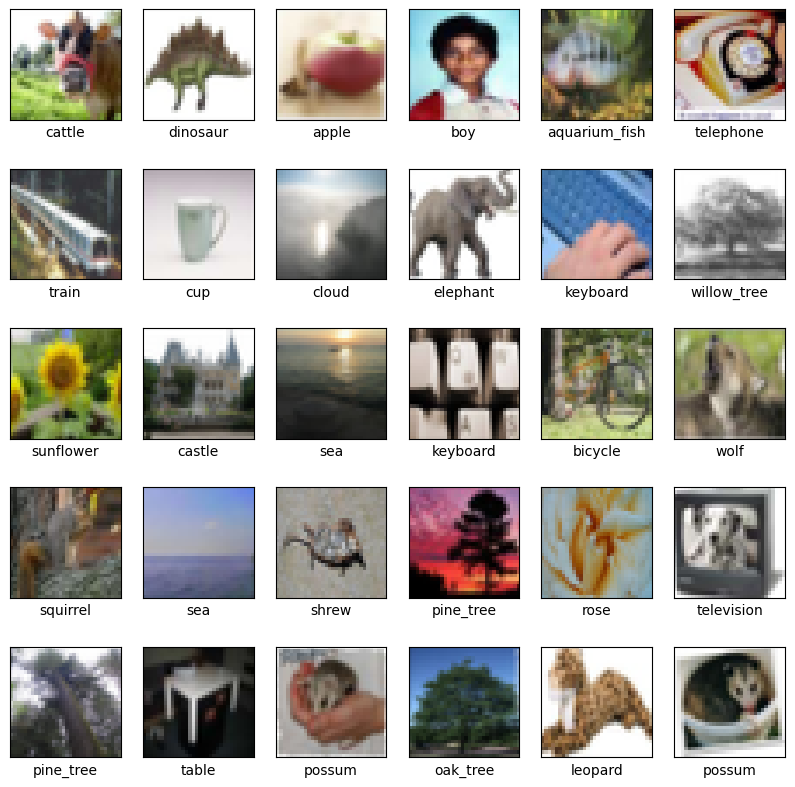

In [7]:
plt.figure(figsize=[10,10])
for i in range(30):
  plt.subplot(5,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i])
  plt.xlabel(class_names[y_train[i, 0]])
plt.show()

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
num_classes = len(np.unique(y_train))  # likely 100

print(num_classes)

model = Sequential()
model.add(Conv2D(128, kernel_size=(3, 3), strides=(1,1),
                 padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D(pool_size=(3, 3)))
model.add(Dropout(0.25)) # randomly kills some of the neurons

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))


model.add(Dense(num_classes, activation='softmax'))  # <-- changed from 10 to num_classes

model.summary()

100


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │     1,280,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,303,884 (4.97 MB)

 Trainable params: 1,303,884 (4.97 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=25,
    validation_data=(X_test, y_test),
    verbose=2
)

Epoch 1/25
391/391 - 10s - 26ms/step - accuracy: 0.1040 - loss: 3.9277 - val_accuracy: 0.1770 - val_loss: 3.4576
Epoch 2/25
391/391 - 3s - 8ms/step - accuracy: 0.2183 - loss: 3.2333 - val_accuracy: 0.2475 - val_loss: 3.1002
Epoch 3/25
391/391 - 3s - 8ms/step - accuracy: 0.2690 - loss: 2.9632 - val_accuracy: 0.2801 - val_loss: 2.9068
Epoch 4/25
391/391 - 3s - 8ms/step - accuracy: 0.3026 - loss: 2.7806 - val_accuracy: 0.2961 - val_loss: 2.8148
Epoch 5/25
391/391 - 3s - 8ms/step - accuracy: 0.3275 - loss: 2.6503 - val_accuracy: 0.3193 - val_loss: 2.7138
Epoch 6/25
391/391 - 3s - 8ms/step - accuracy: 0.3502 - loss: 2.5409 - val_accuracy: 0.3305 - val_loss: 2.6569
Epoch 7/25
391/391 - 3s - 8ms/step - accuracy: 0.3659 - loss: 2.4594 - val_accuracy: 0.3373 - val_loss: 2.6271
Epoch 8/25
391/391 - 3s - 8ms/step - accuracy: 0.3847 - loss: 2.3744 - val_accuracy: 0.3447 - val_loss: 2.5808
Epoch 9/25
391/391 - 3s - 8ms/step - accuracy: 0.3969 - loss: 2.3183 - val_accuracy: 0.3555 - val_loss: 2.5639

Text(0.5, 1.0, 'Loss Curves')

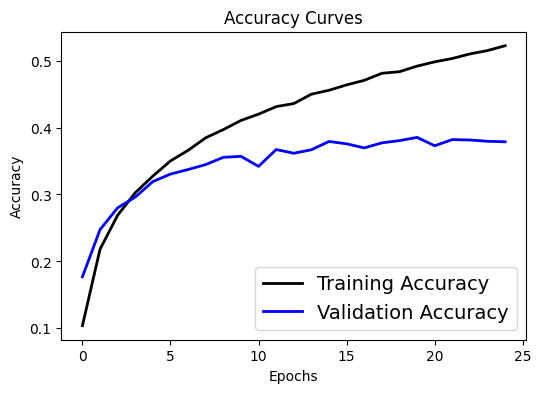

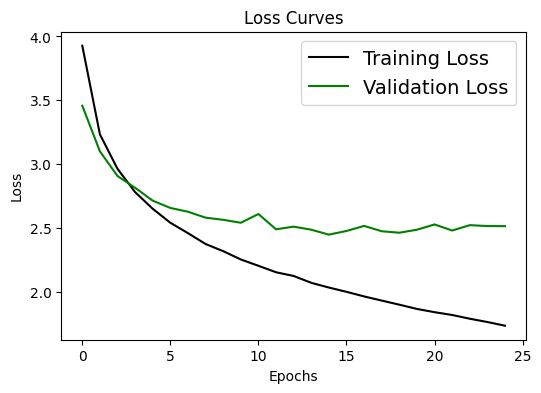

In [14]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black')
plt.plot(history.history['val_loss'], 'green')
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)


In [15]:
# Predict
y_pred = model.predict(X_test)

# Convert the predictions into label index
y_pred = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


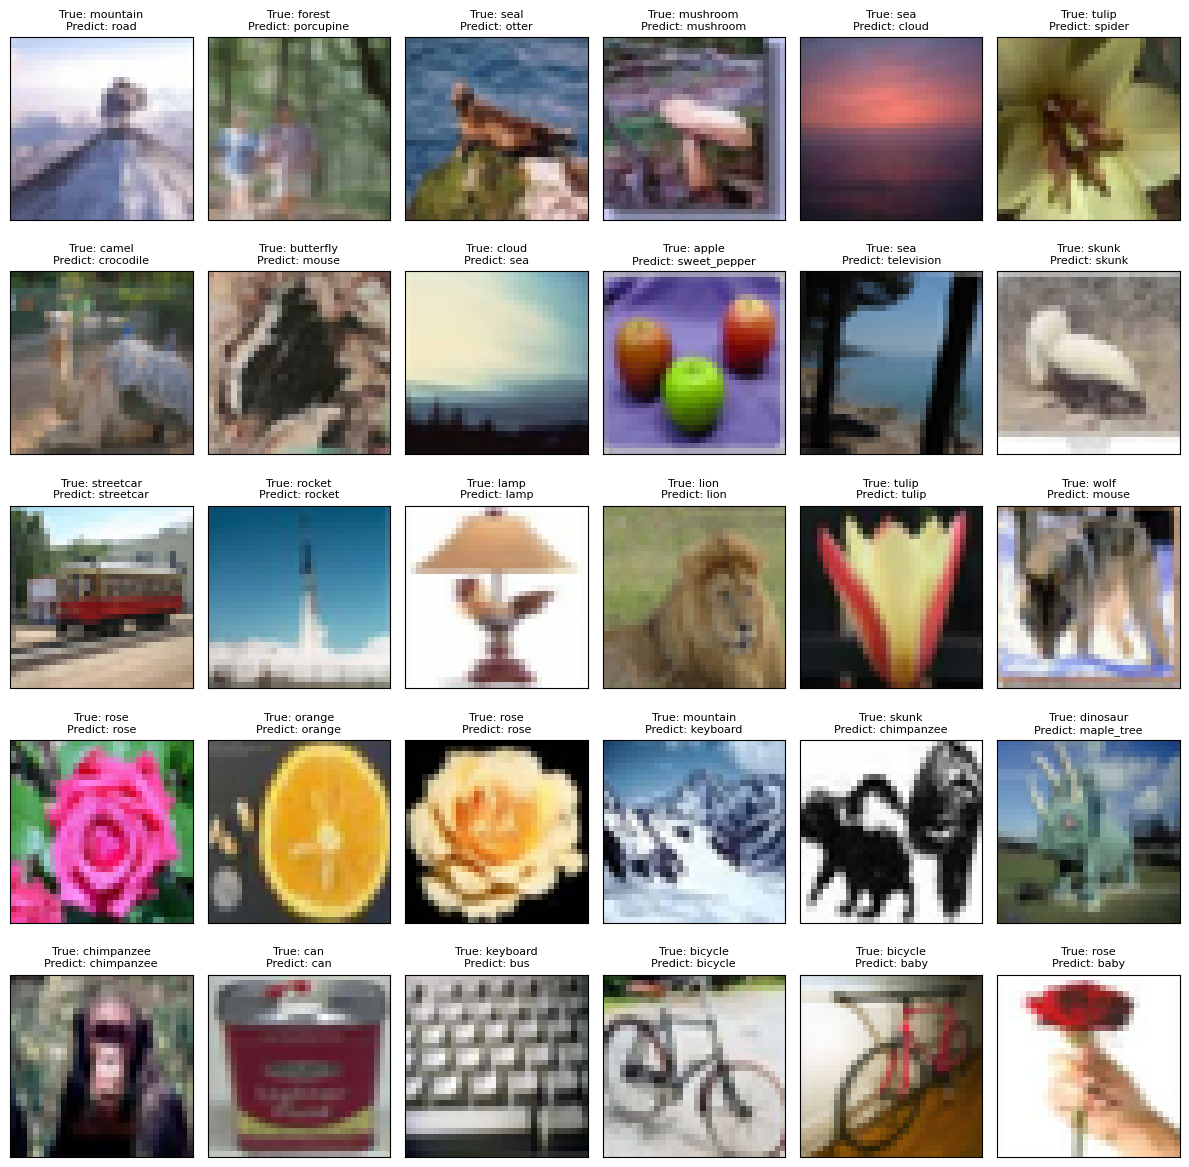

In [16]:
num_images = 30
rows, cols = 5, 6   # 5x6 grid = 30 images

plt.figure(figsize=(12, 12))

for i in range(num_images):
    plt.subplot(rows, cols, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Show image
    plt.imshow(X_test[i])

    # True and predicted labels (handle 1D or 2D y_test)
    true_idx = y_test[i] if np.ndim(y_test) == 1 else y_test[i][0]
    pred_idx = y_pred[i]

    true_label = class_names[true_idx]
    pred_label = class_names[pred_idx]

    plt.title(f"True: {true_label}\nPredict: {pred_label}", fontsize=8)

plt.tight_layout()
plt.show()

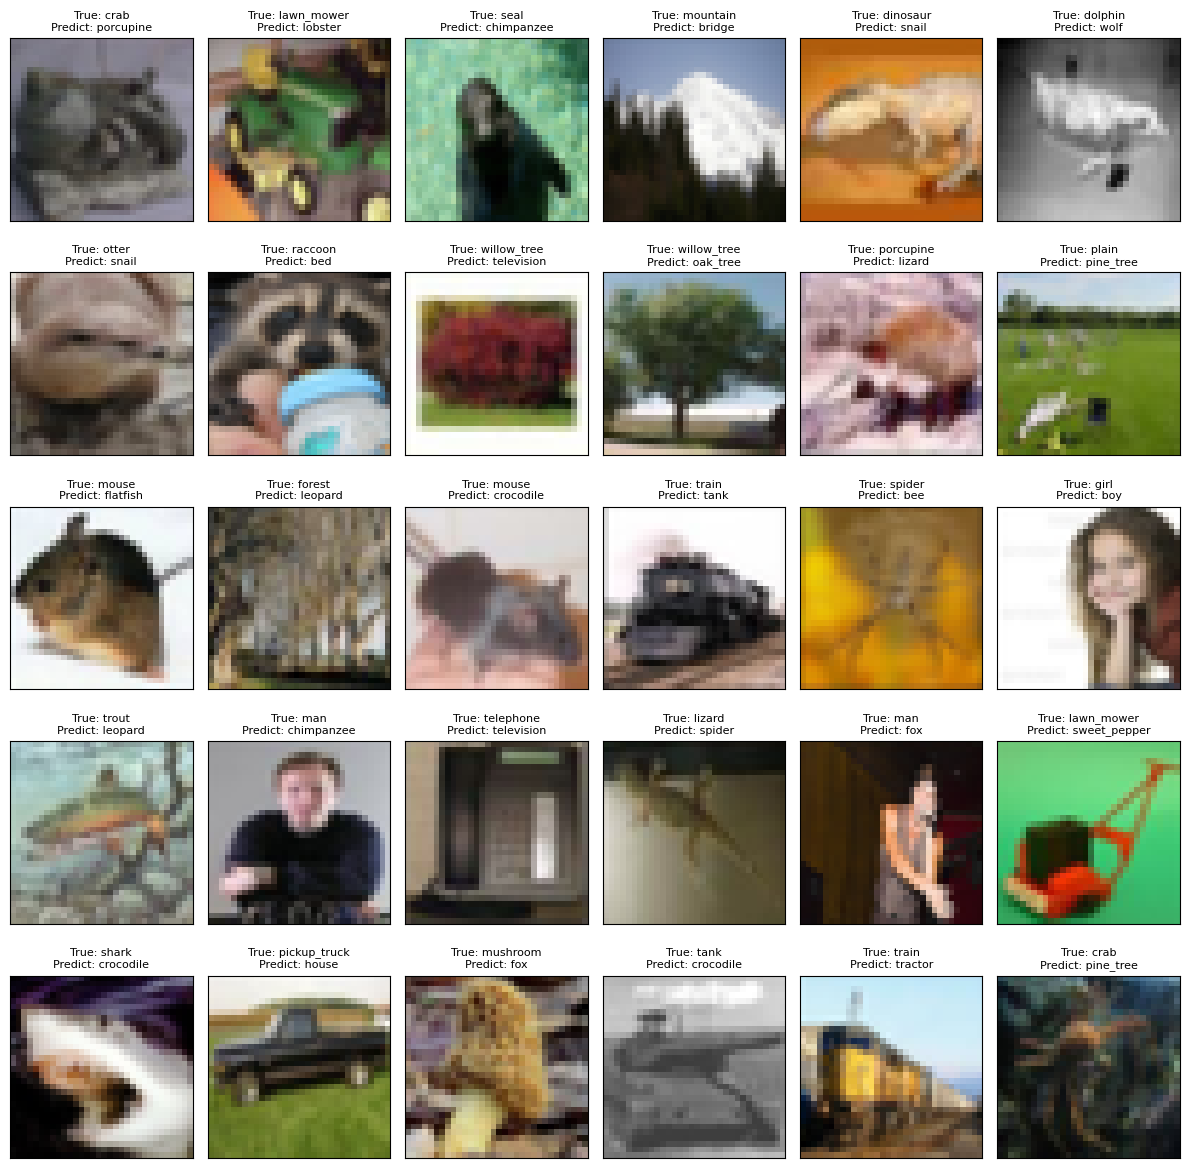

In [21]:
mis_idx = np.where(y_test.squeeze() != y_pred)[0]


num_to_show = min(30, len(mis_idx))

chosen = np.random.choice(mis_idx, size=num_to_show, replace=False)


rows, cols = 5, 6 # our 5 * 6 grid
plt.figure(figsize=(12, 12))

for i, idx in enumerate(chosen):
    plt.subplot(rows, cols, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(X_test[idx])

    true_label = class_names[y_test.squeeze()[idx]]
    pred_label = class_names[y_pred[idx]]

    plt.title(f"True: {true_label}\nPredict: {pred_label}", fontsize=8)

plt.tight_layout()
plt.show()